# Decision Trees -Intution

### Frame 
- What is a decision tree?

### Acquire 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [11]:
df = pd.read_csv("data/creditRisk.csv")

In [12]:
df.head()

,Income,Credit History,Risk
0,0,Unknown,High
1,0,Bad,High
2,0,Good,High
3,14000,Unknown,High
4,14000,Bad,High


In [13]:
# ! pip install plotnine
# ! pip install modelvis

# Explore

In [14]:
from plotnine import *

/Users/jagritij/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


or import plotnine

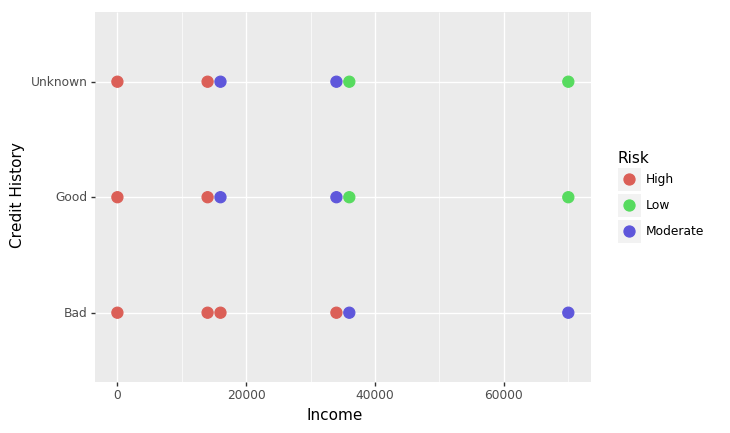

<ggplot: (-9223372036564774677)>

In [15]:
ggplot(df) + aes(x="Income", y="Credit History", color ="Risk")+ geom_point(size=4)

In [16]:
aes?

In [17]:
df

,Income,Credit History,Risk
0,0,Unknown,High
1,0,Bad,High
2,0,Good,High
3,14000,Unknown,High
4,14000,Bad,High
5,14000,Good,High
6,16000,Unknown,Moderate
7,16000,Bad,High
8,16000,Good,Moderate
9,34000,Unknown,Moderate


# Transform, the model also can't understand english, so we need to convert the credit history to numbers

- using label encoding here to convert ordinal data

In [18]:
df1=df.copy()

In [19]:
from sklearn import preprocessing

In [20]:
#instantiate a label encoder
le =preprocessing.LabelEncoder()

In [21]:
#fit the label encoder

In [22]:
le.fit(df['Credit History'])

LabelEncoder()

In [23]:
le.classes_

array(['Bad', 'Good', 'Unknown'], dtype=object)

In [24]:
#Transform the Credit History
df1['Credit History'] = le.transform(df['Credit History'])

In [25]:
df1.head()

,Income,Credit History,Risk
0,0,2,High
1,0,0,High
2,0,1,High
3,14000,2,High
4,14000,0,High


In [26]:
#instantiate a label encoder
le1 =preprocessing.LabelEncoder()
le1.fit(df['Risk'])

LabelEncoder()

In [27]:
le1.classes_

array(['High', 'Low', 'Moderate'], dtype=object)

In [28]:
#Transform the Risk

df1['Risk']= le1.transform(df['Risk'])

In [29]:
df1.head()

,Income,Credit History,Risk
0,0,2,0
1,0,0,0
2,0,1,0
3,14000,2,0
4,14000,0,0


# Model

In [30]:
# Build a Decision Tree classifier

X = df1[['Income', 'Credit History']]
y =df1 ['Risk']

In [31]:
#import the library

from sklearn.tree import DecisionTreeClassifier

In [32]:
#Instantiate the tree
clf =DecisionTreeClassifier()

In [33]:
#fit the Model
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
X


,Income,Credit History
0,0,2
1,0,0
2,0,1
3,14000,2
4,14000,0
5,14000,1
6,16000,2
7,16000,0
8,16000,1
9,34000,2


### Visualize the model

In [35]:
#Visualize the model
from modelvis import plot_classifier_2d

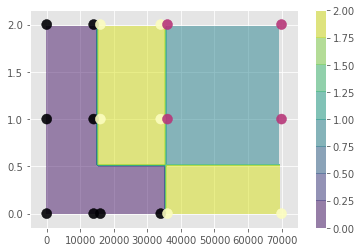

In [36]:
plot_classifier_2d(clf, X, y)

### Visualize the tree

In [37]:
import pydotplus
from IPython.display import Image

In [38]:
from sklearn import tree

In [39]:
dot_date =tree.export_graphviz( clf, out_file='tree.dot',
                                     feature_names = X.columns,
                                     class_names = ['Low', 'Moderate', 'High'],
                                     rounded = True)

In [40]:
graph = pydotplus.graph_from_dot_file('tree.dot')

In [41]:
#Image(graph.create_png())

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clr_lr = LogisticRegression()

In [44]:
clr_lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
#plot_classifier_2d(clf_lr, X, y)